1. Загружаем библиотеки

In [4]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.6 MB/s eta 0:00:00


In [5]:
from Bio import Entrez

In [6]:
from Bio import SeqIO

In [7]:
Entrez.email="A.N.Other@example.com"

In [8]:
import pandas as pd
import io
import xml.etree.ElementTree as ET

2. Загружает файл

In [9]:
from google.colab import files
uploaded = files.upload()

Saving gene_disease_associations.tsv to gene_disease_associations.tsv


In [10]:
dis = pd.read_table(io.BytesIO(uploaded['gene_disease_associations.tsv']))
dis.head(10)

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
5,2,A2M,0.529,0.769,C0011265,Presenile dementia,disease,C10;F03,Mental or Behavioral Dysfunction,0.30,1.000,1998.0,2004.0,3,0,CTD_human
6,2,A2M,0.529,0.769,C0011570,Mental Depression,disease,F01,Mental or Behavioral Dysfunction,0.30,1.000,1987.0,2000.0,2,0,PSYGENET
7,2,A2M,0.529,0.769,C0011581,Depressive disorder,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,1987.0,2000.0,2,0,PSYGENET
8,2,A2M,0.529,0.769,C0019202,Hepatolenticular Degeneration,disease,C16;C06;C18;C10,Disease or Syndrome,0.30,1.000,2013.0,2013.0,1,0,CTD_human
9,2,A2M,0.529,0.769,C0022660,"Kidney Failure, Acute",disease,C13;C12,Disease or Syndrome,0.30,1.000,2013.0,2013.0,1,0,CTD_human


In [11]:
diseaseName=pd.unique(dis['diseaseName'])

In [12]:
print(diseaseName)

['Hepatomegaly' 'Schizophrenia' "Alzheimer's Disease" ...
 'ALBINISM, OCULOCUTANEOUS, TYPE V' 'OPTIC ATROPHY 8'
 'North Carolina macular dystrophy']


In [13]:
dis.shape

(84038, 16)

In [14]:
dis['diseaseName'].value_counts()

Malignant neoplasm of breast                  1074
Schizophrenia                                  883
Liver Cirrhosis, Experimental                  774
Colorectal Carcinoma                           702
Malignant neoplasm of prostate                 616
                                              ... 
GLYCOGEN STORAGE DISEASE IXa1                    1
Complement Component 7 Deficiency                1
COMPLEMENT COMPONENT 8 DEFICIENCY, TYPE I        1
COMPLEMENT COMPONENT 8 DEFICIENCY, TYPE II       1
North Carolina macular dystrophy                 1
Name: diseaseName, Length: 11181, dtype: int64

3. Выбираем заболевание для работы - Liver Cirrhosis, Experimental (Цирроз печени, экспериментальный)

In [15]:
liver=dis.loc[dis['diseaseName'] == 'Liver Cirrhosis, Experimental']
liver # выбираем заболевание для работы - Liver Cirrhosis, Experimental (Цирроз печени, экспериментальный)

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
11,2,A2M,0.529,0.769,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
84,13,AADAC,0.631,0.615,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
100,18,ABAT,0.628,0.538,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
332,38,ACAT1,0.538,0.692,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
377,43,ACHE,0.445,0.885,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2006.0,2006.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82696,493869,GPX8,1.000,0.077,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
83426,768211,RELL1,0.890,0.115,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
83597,100130890,TSTD3,1.000,0.077,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
83609,100133941,CD24,0.472,0.769,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human


4. Выбираем из таблицы один любой ген, связанный с данным заболевание, и ищем для него интересующую нас информацию. Мы ищем координаты начала и конца гена, его ID и нить ДНК (плюс или минус).

In [16]:
# анализируем ген A2M, ID = 2
handle=Entrez.efetch(db='gene',id='2',rettype='xml')
gene_locus=ET.parse(handle).getroot().find('Entrezgene/Entrezgene_locus')
region=gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
start=int(region.find("Seq-interval_from").text)+1
end=int(region.find("Seq-interval_to").text)+1
gi_id=region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
strand=region.find("Seq-interval_strand/Na-strand").get("value")
print("start: ",start,"end: ",end,"id: ",gi_id,"нить: ",strand)

start:  9067708 end:  9116229 id:  568815586 нить:  minus


In [17]:
handle=Entrez.esummary(db="gene", id=2, rettype="xml")
record = Entrez.read(handle)
record['DocumentSummarySet']['DocumentSummary'][0]['Name']

'A2M'

In [18]:
id_chrom = record['DocumentSummarySet']['DocumentSummary'][0]['GenomicInfo'][0]['ChrAccVer']
id_chrom

'NC_000012.12'

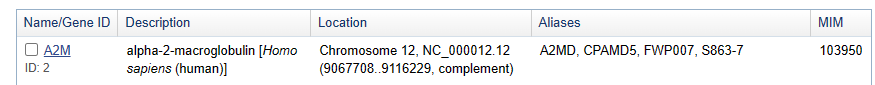

Данные по генам в базе Entrez находятся в формате xml. Глядя на пример, подумайте, как можно вытащить другую информацию о гене, например, хромосому, на которой расположен ген.

In [19]:
handle = Entrez.esummary(db="gene", id=2, rettype = 'xml')
record = Entrez.read(handle)

In [20]:
chrom_num = record['DocumentSummarySet']['DocumentSummary'][0]['Chromosome']
chrom_num

'12'

Ген А2М находится на 12-й хромосоме. ID = NC_000012.12

5. Мы выгружаем всю исходную хромосому, на которой расположен ген.

In [21]:
handle = Entrez.efetch(db="nucleotide",
                       id="NC_000012.12",
                       rettype = 'fasta',
                       retmode = 'text')
#загружаем
chromosome = SeqIO.read(handle, 'fasta')

In [22]:
chromosome

SeqRecord(seq=Seq('NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...NNN'), id='NC_000012.12', name='NC_000012.12', description='NC_000012.12 Homo sapiens chromosome 12, GRCh38.p14 Primary Assembly', dbxrefs=[])

In [23]:
chromosome.description

'NC_000012.12 Homo sapiens chromosome 12, GRCh38.p14 Primary Assembly'

6. Вырезаем из полученной хромосомы интересующий нас ген по координатам начала и конца из пункта 4.

In [24]:
geneA2M = chromosome.seq[9067708:9116229]
print(geneA2M)
len(geneA2M)

ACATTGACCAGAAAAAGTGTTTATTCATCAAGTCTTTAAAGATACAAAAACACGTGTCTTCTGTGGAGCTCTGAGAACAGGACTCCAGCAAAGCACTTTTCAGCCTTGTGGTCTTCAAGCATTTCCAAGATCTGTGACATTGGAAAGAAAAAAAATTAAGACAGATTTGGGTCTCCATGAGCAGAGAGTATTCTTTCCCTTAGTTCTGGGTAGCATAGTGCCCAAGGAAACCTAATCAGTACAGTGGGAAACCAAATCTATTCCAAATCATTACCCATAAGCAATCCTATGGACTCTCTGAGGTTTGACAGAGTCAGCGGCCCTCTCCAATAAATGTGTTTTTCTATAATAATGTGCAGTGTGAGTAATTTGATGTTTTTGACAAATATTTACCCAGCGTTTTATGAAGGAGAAGGTTTGGGGGGCAAGCTGAAGGAGCTCTGACTGCCTTTTGGAGGAGTGTGAGTGGCTTACCTTTGCTGCAAGGAGCATTGTACTCAGCAATTGCAAACTCATCTGAAAAAAAAAAAACCAACAAAAAACCAGAAATCATTACATGAAGTGAGAAAGAAAGCAAACATCTGTGGGATACAGGCCAAGGAAGGAGTTTGTTGTGGGAAGAACAGTATTGTACCAGAAACATAAGCATCATTCATCTGATGTGTTGCTTGCTACCTTATATTCTCCTTTCAAATATAGTGTTTTATATATTCTTTTATCCCAAACTCCTGAAGGACTCTTCAGATGTTCTACTTACTTAAATCTCATATTGTCATACAGTCCATTTATCTGATGAAAAGGGAACTAAATATCCCACAGGTGTTTTGTATTAGTAGTTGATAAATTTATAATGTAGGTTGTTTCTATAATGTATGTATAAGAGACAAAAAGAGGGGCATCAGACTTGATGGAGACAAAATGAAGTGATAATGTAATTACTTAATGTAATAAATAACCCCAACACATCTCCTAAACCTGAATTTCTGTGATCAGGAATTAA

48521

Дополнительное задание (по желанию). Дополните таблицу из пункта 4 данными о длине каждого гена.

In [25]:
liver_cirrhosis_db = dis.loc[dis['diseaseName'] == "Liver Cirrhosis, Experimental"]
liver_cirrhosis_db

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
11,2,A2M,0.529,0.769,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
84,13,AADAC,0.631,0.615,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
100,18,ABAT,0.628,0.538,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
332,38,ACAT1,0.538,0.692,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
377,43,ACHE,0.445,0.885,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2006.0,2006.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82696,493869,GPX8,1.000,0.077,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
83426,768211,RELL1,0.890,0.115,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
83597,100130890,TSTD3,1.000,0.077,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human
83609,100133941,CD24,0.472,0.769,C0023893,"Liver Cirrhosis, Experimental",disease,C23;C06,Experimental Model of Disease,0.3,1.0,2014.0,2014.0,1,0,CTD_human


In [26]:
gene_id_lst=liver_cirrhosis_db['geneId'].tolist()
gene_id_lst

[2,
 13,
 18,
 38,
 43,
 54,
 59,
 87,
 100,
 120,
 123,
 127,
 133,
 135,
 140,
 147,
 173,
 174,
 178,
 183,
 199,
 213,
 216,
 217,
 219,
 231,
 291,
 301,
 302,
 306,
 307,
 308,
 317,
 330,
 337,
 339,
 351,
 355,
 364,
 397,
 409,
 427,
 440,
 467,
 486,
 558,
 613,
 622,
 633,
 644,
 655,
 706,
 712,
 713,
 714,
 728,
 730,
 733,
 752,
 761,
 817,
 822,
 834,
 837,
 840,
 857,
 866,
 871,
 890,
 900,
 922,
 924,
 942,
 948,
 952,
 962,
 963,
 967,
 968,
 972,
 983,
 1003,
 1026,
 1033,
 1036,
 1052,
 1149,
 1176,
 1192,
 1193,
 1244,
 1267,
 1268,
 1277,
 1278,
 1281,
 1282,
 1284,
 1289,
 1290,
 1291,
 1292,
 1303,
 1316,
 1326,
 1373,
 1407,
 1410,
 1436,
 1440,
 1490,
 1510,
 1520,
 1522,
 1525,
 1535,
 1536,
 1544,
 1586,
 1592,
 1610,
 1644,
 1645,
 1675,
 1733,
 1807,
 1848,
 1894,
 1901,
 1906,
 1950,
 1990,
 2012,
 2015,
 2028,
 2037,
 2081,
 2134,
 2149,
 2169,
 2173,
 2180,
 2195,
 2200,
 2207,
 2209,
 2214,
 2219,
 2247,
 2268,
 2273,
 2274,
 2280,
 2313,
 2316,
 2326

In [27]:
gene_info = liver_cirrhosis_db[['geneId','geneSymbol']]
gene_info

,geneId,geneSymbol
11,2,A2M
84,13,AADAC
100,18,ABAT
332,38,ACAT1
377,43,ACHE
...,...,...
82696,493869,GPX8
83426,768211,RELL1
83597,100130890,TSTD3
83609,100133941,CD24


In [36]:
gene_info_10=gene_info.head(10)

In [28]:
# функция сборки информации для каждого гена болезни Liver Cirrhosis

def get_gene_info(row):
  gene_id = row['geneId']
  handle = Entrez.efetch(db="gene", id=gene_id, rettype = 'xml')
  gene_locus=ET.parse(handle).getroot().find('Entrezgene/Entrezgene_locus')
  region=gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
  gene_locus.find("Gene-commentary/Gene-commentary_seqs/Seq-loc/Seq-loc_int/Seq-interval")
  start=int(region.find("Seq-interval_from").text)+1
  end=int(region.find("Seq-interval_to").text)+1
  gi_id=region.find("Seq-interval_id/Seq-id/Seq-id_gi").text
  strand=region.find("Seq-interval_strand/Na-strand").get("value")

  handle = Entrez.esummary(db="gene", id=gene_id, rettype = 'xml')
  record = Entrez.read(handle)
  chrom_num = record['DocumentSummarySet']['DocumentSummary'][0]['Chromosome']
  mapLoc = record['DocumentSummarySet']['DocumentSummary'][0]['MapLocation']
  ID_chr = record['DocumentSummarySet']['DocumentSummary'][0]['GenomicInfo'][0]['ChrAccVer']

  handle = Entrez.efetch(db="nucleotide",
                       id=ID_chr,
                       rettype = 'fasta',
                       retmode = 'text')

  chromosome = SeqIO.read(handle, 'fasta')
  gene = chromosome.seq[start: end]

  row['start'], row['end'], row['gi_id'], row['strand'], row['chrom_num'],\
  row['mapLoc'], row['ID chromosome'], row['gene lenght'], row['gene'] = start, end, gi_id, strand, chrom_num, mapLoc, ID_chr, len(gene), gene

  return row



In [38]:
gene_info_10 = gene_info.apply(get_gene_info, axis=1)
gene_info_10

HTTPError: HTTP Error 400: Bad Request